In [40]:
# What is hypothesis
#Hypothesis -claim or statement that we want to investigate
#Types of hypothesis
#Null hypothesis: =
#Alternate hypothesis: > ,< ,!=
# Hypothesis testing - The process of accepting or rejecting a null hypothesis
#Type I error -alpha- Rejecting a null hypothesis when it is actually true.
# Type II error -beta- Fail to reject a null hypothesis when it is false. 
#Confidence level - For example, a 95% confidence level means that if we were to take many samples and calculate a confidence interval for each sample, approximately 95% of those intervals would contain the true population parameter.
#significance level-5% -> alpha--a significance level of 0.05 (or 5%) means that if the null hypothesis is true, there is a 5% chance of mistakenly rejecting it (i.e., making a Type I error).
#A p-value is a metric that expresses the likelihood that an observed difference could have occurred by chance.
import pyforest

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/images/95contint.gif

**Null Hypothesis (H0):**
- Definition: The null hypothesis is a statement that there is no significant difference, effect, or relationship between variables.
- Symbol: Denoted by H0.
- Assumption: It assumes that any observed difference or effect is due to random chance or sampling variability.
- Example: In a drug trial, the null hypothesis might state that the new drug has no effect on patients' blood pressure.

**Alternative Hypothesis (H1):**
- Definition: The alternative hypothesis is a statement that there is a significant difference, effect, or relationship between variables.
- Symbol: Denoted by H1.
- Contrast: It represents the opposite of the null hypothesis and asserts that any observed difference or effect is not due to random chance.
- Example: In the same drug trial, the alternative hypothesis might state that the new drug decreases patients' blood pressure.


The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

##### Level of significance
- Refers to the degree of significance in which we accept or reject the null-hypothesis
- 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%

##### Parametric Tests 
- Parametric tests are those tests for which we have prior knowledge of the population distribution (i.e, normal), or if not then we can easily approximate it to a normal distribution which is possible with the help of the Central Limit Theorem
- Common parametric tests:
    1. T-test
    2. Z-test
    3. ANOVA

##### Non-Parametric Tests
- In Non-Parametric tests, we don’t make any assumption about the parameters for the given population or the population we are studying
- There is no fixed set of parameters is available, and also there is no distribution of any kind available for use; hence, referred to as `distribution-free tests`
- Common non-parametric tests:
    1. Chi-square test
    2. Mann-Whitney U-test
    3. Kruskal-Wallis H-test

#### Z-Test
- A parametric test used to determine whether the means are different when the population variance is known and the sample size is large (i.e, greater than 30)
- Assumptions of this test:
   1. Population distribution is normal
   2. Samples are random and independent
   3. The sample size is large
   4. Population standard deviation is known

In [7]:
from statsmodels.stats import weightstats as test


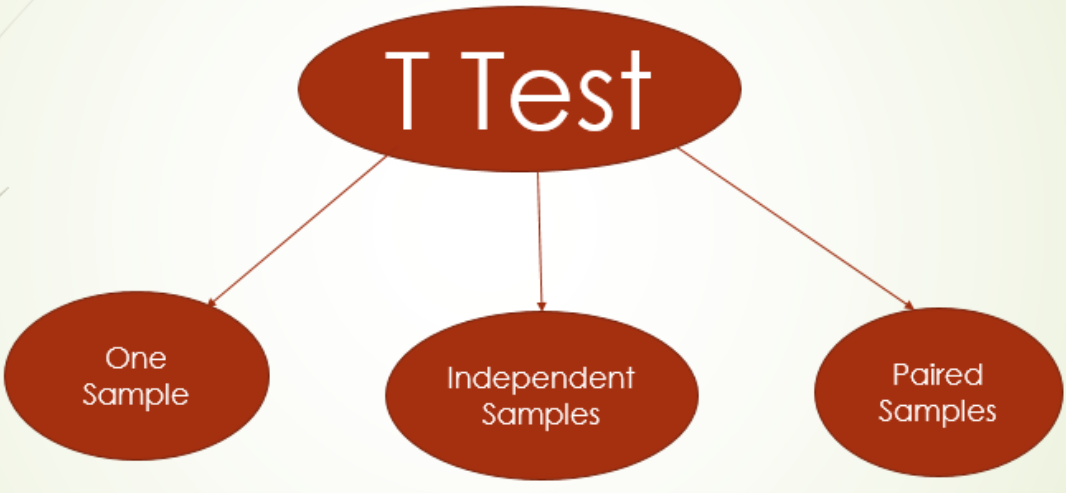

######  T Tests
- A t-test is a statistical method used to compare the means of two groups and determine if there is a significant difference between them. 
- It's commonly used when you have a small sample size or when the population standard deviation is unknown.
###### One sample t-test 
- The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean
- The One Sample t Test is a parametric test

A restaurant manager claims that the average total bill per transaction at their restaurant is $20. To verify this claim, a random sample of transactions is taken, and the average total bill per transaction is calculated. Conduct a hypothesis test at a 5% level of significance to determine if there is sufficient evidence to reject the manager's claim.

Null Hypothesis, H0: Averge total_bill is 20$,mu = 20
Alternate hypothesis,H1/Ha : Average is not 20$ , mu != 20

In [10]:
df = sns.load_dataset("tips")
#df.pd_read.csv("tips.csv")
df.head()

<IPython.core.display.Javascript object>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [15]:
df.shape #no. of rows and columns

(244, 7)

In [12]:
import scipy.stats as st

In [14]:
st.ttest_1samp(df.total_bill,20)

TtestResult(statistic=-0.37559294451919506, pvalue=0.7075471935626723, df=243)

In [ ]:
Since pvalue > 0.05 , fail to reject the Ho. 
Initial claim by the manager that average bill is 20 cannot be rejected.

##### Two sample t-test
- Compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different
- Parametric test

#### Is Age influencing the attrition? pls verify at 5% level of significance?

In [16]:
hrdata = pd.read_csv("hrdata.csv")
hrdata.head() #Top 5 rows

<IPython.core.display.Javascript object>

,EmployeeCount,EmployeeID,Department,JobRole,Attrition,Gender,Age,MaritalStatus,Education,EducationField,...,Hourlyrate,Income,Salaryhike,OverTime,Workex,YearsSinceLastPromotion,EmpSatisfaction,TrainingTimesLastYear,WorkLifeBalance,Performance_Rating
0,1,1,Sales,Sales Executive,Yes,Female,41,Single,College,Life Sciences,...,94,5993,11,Yes,8,0,Medium,0,Bad,Excellent
1,1,2,Research & Development,Research Scientist,No,Male,49,Married,Below College,Life Sciences,...,61,5130,23,No,10,1,High,3,Better,Outstanding
2,1,4,Research & Development,Laboratory Technician,Yes,Male,37,Single,College,Other,...,92,2090,15,Yes,7,0,Very High,3,Better,Excellent
3,1,5,Research & Development,Research Scientist,No,Female,33,Married,Master,Life Sciences,...,56,2909,11,Yes,8,3,Very High,3,Better,Excellent
4,1,7,Research & Development,Laboratory Technician,No,Male,27,Married,Below College,Medical,...,40,3468,12,No,6,2,Low,3,Better,Excellent


In [17]:
hrdata.Attrition.value_counts() # Number of categories

Attrition
No     1233
Yes     237
Name: count, dtype: int64

- Null Hypothesis : H0 : There is no effect of age on attrition : mu_age_yes = mu_age_no
- Alternate hypothesis : There is an effect of age on attrition : mu_age_yes != mu_age_no

In [ ]:
# Test of normality --- Shapiro-- need not do here
# Test of variance -- levene test ---

In [23]:
age_attrition_yes = hrdata[hrdata['Attrition']=="Yes"]['Age']
age_attrition_no = hrdata[hrdata['Attrition']=="No"]['Age']

Test of variance:
- H0: populationvariance_age_yes = populationvariance_age_no
- H1: populationvariance_age_yes != populationvariance_age_no

In [24]:
st.levene(age_attrition_yes,age_attrition_no)

LeveneResult(statistic=0.48784929772776303, pvalue=0.4849988830829256)

Since pvalue > 0.05 , fail to reject Ho, population variances are equal

In [25]:
#Two sample t test
st.ttest_ind(age_attrition_yes,age_attrition_no,equal_var=True)

TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0)

**Business Inference:** Since pvalue < alpha, there is sufficient evidence to reject the Ho. Age has a significant impact on Attrition

#### Is monthly income influencing the attrition? verify @ 5% level of significance.

In [26]:
hrdata.columns

Index(['EmployeeCount', 'EmployeeID', 'Department', 'JobRole', 'Attrition',
       'Gender', 'Age', 'MaritalStatus', 'Education', 'EducationField',
       'BusinessTravel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'Hourlyrate', 'Income', 'Salaryhike', 'OverTime', 'Workex',
       'YearsSinceLastPromotion', 'EmpSatisfaction', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'Performance_Rating'],
      dtype='object')

- H0: There is no impact of monthly Income on attrition : mu_income_yes = mu_income_no
- H1 :There is an impact of monthly Income on attrition : mu_income_yes != mu_income_no

In [27]:
income_yes = hrdata[hrdata['Attrition']=="Yes"]['Income']
income_no = hrdata[hrdata['Attrition']=="No"]['Income']

In [29]:
st.levene(income_yes,income_no)

LeveneResult(statistic=14.899586974568717, pvalue=0.00011830973427184532)

In [30]:
st.ttest_ind(income_yes,income_no,equal_var=False)

TtestResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13, df=412.74074755747006)

Since pvalue< alpha, There is a significant impact of Monthly Income on Attrition

#### Paired t test
Test whether drug is effective or not for the following sample data on 10 patients of sugar level. The data is captured before the drug and after the drug. Verify at 5 % significance level.

before = [165, 222, 172, 193, 225, 254, 157, 245, 225, 197])

after = ([140, 115, 172, 122, 143, 182, 175, 107, 134, 149])

In [31]:
before = np.array([165, 222, 172, 193, 225, 254, 157, 245, 225, 197])
after = np.array([140, 115, 172, 122, 143, 182, 175, 107, 134, 149])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- H0: There is no effect of the drug on the sugar level of patients. mu_sugarlevel_before <= mu_sugarlevel_after
- H1 : Sugarlevel of patients have reduced after taking the drug, mu_sugarlevel_before > mu_sugarlevel_after

In [32]:
st.ttest_rel(before,after,alternative='greater')

TtestResult(statistic=4.029750894315599, pvalue=0.0014870438990162412, df=9)

Since pvalue < alpha, there is sufficient evidence to reject Ho. There is an impact of drug on the sugarlevel of patients. Sugarlevel of patients reduce after taking the drug.

#### Is there any relationship b/w monthly income and age? verify this @5% level of significance 

In [37]:
df1  = hrdata[['Income','Age']]
df1.corr()

,Income,Age
Income,1.000000,0.497855
Age,0.497855,1.000000


<Axes: >

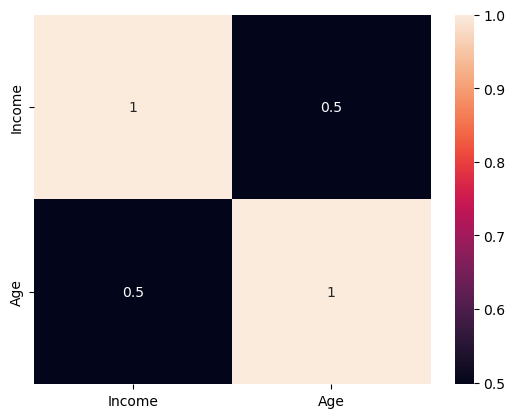

In [39]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

- H0: There is no relation between monthly Income and age ,rho(pearson corr coeff=0)
- H1: There is relation between monthly Income and age,eho(pearson corr coeff !=0)

In [41]:
st.pearsonr(df1.Income,df1.Age)

PearsonRResult(statistic=0.49785456692658037, pvalue=6.669539203000345e-93)

Since pvalue < alpha, there is relation between monthly Income and age

#### One Sample Test of Proportion- Z-Proportion test

#### The overall attrition proportion is 17%? pls verify this statment @ 5% level of significance?

- H0: Overall attrition proportion is 17 % , P = 0.17
- H1 : P != 0.17 ,  Overall attrition proportion is not 17 % 

In [43]:
hrdata.Attrition.value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [47]:
hrdata.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [44]:
from statsmodels.stats.proportion import proportions_ztest,proportion_confint

In [45]:
hrdata.shape # rows,cols

(1470, 24)

In [49]:
n = 1470
x = 237
P = 0.17

In [53]:
proportions_ztest(x,n,P)

(-0.9149401086321534, 0.3602230724839405)

Since pvalue > 0.05 , fail to reject H0.Initial claim that attrition 17 % cannot be rejected.

In [51]:
proportion_confint(237,1470,0.05)

(0.14242579053277477, 0.18002318905906195)

#### Two Samples Z proportion Test

#### Is there any relationship b/w gender and attrition? verify it @ 5% level of significance?

- H0: There is no relation between Gender and attrition : Percent_male_attrition = Percent_female_attrition
- H0: There is relation between Gender and attrition : Percent_male_attrition != Percent_female_attrition

In [55]:
pd.crosstab(hrdata.Attrition,hrdata.Gender,margins=True)

<IPython.core.display.Javascript object>

Gender,Female,Male,All
Attrition,,,
No,501,732,1233
Yes,87,150,237
All,588,882,1470


In [56]:
proportions_ztest([150,87],[882,588])

(1.1292547809155016, 0.2587903704911598)

Since p value > alpha, fail to reject Ho. There is no relation between Gender and Attrition.

#### Is there any relationship b/w overtime and Attrition? verify it @5% level of significance?

#### Chi -Square test of Association - if the cross tab is > 2 X 2 matrix

#### Is there any relationship b/w marital status and attrition?

#### ANOVA(Analysis of Variance)

#### Is there any relationship b/w monthly income and employee satisfaction?